In [29]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("/Users/zhejindong/Desktop/take_home_data.csv")

In [3]:
df['day'] = pd.to_datetime(df['day'])
df['weekday']=df['day'].dt.weekday
df['weekofmonth'] = pd.to_numeric(df['day'].dt.day//7 + 1)

In [4]:
df.shape

(35780, 16)

In [5]:
# data is collected from 
df.day.max()

Timestamp('2020-01-31 00:00:00')

In [6]:
# data is collected ends on 
df.day.min()

Timestamp('2020-01-01 00:00:00')

In [7]:
# number of users 
df.user_id.drop_duplicates().shape[0]

2198

In [8]:
# number of countries 
df.country.drop_duplicates().shape[0]

5

# User statistics 

## Age distribution 

In [9]:
def show_age(country,df):
    print('\n')
    print(country)
    print("Female")
    plt.plot()
    bins = [15,20,25,30,35,40,45,50,100]
    df_temp = df[(df.country == country)&(df.gender == 'Female')]
    df_show = df_temp.groupby(pd.cut(df_temp['age'], bins=bins)).age.count()
    df_show.plot(kind='bar')
    plt.pause(1)
    print("Male")
    plt.plot()
    df_temp = df[(df.country == country)&(df.gender == 'Male')]
    df_show = df_temp.groupby(pd.cut(df_temp['age'], bins=bins)).age.count()
    df_show.plot(kind='bar')
    plt.pause(1)



Italy
Female


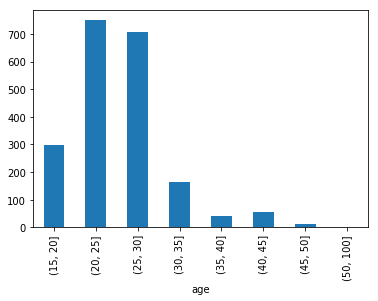

Male


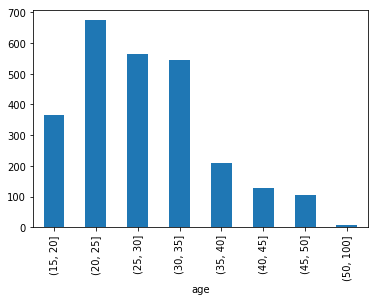



Argentina
Female


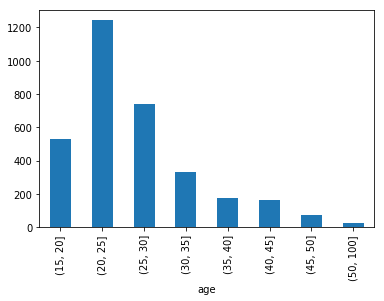

Male


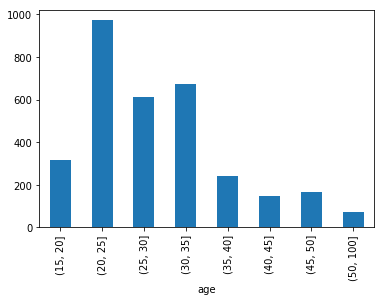



Indonesia
Female


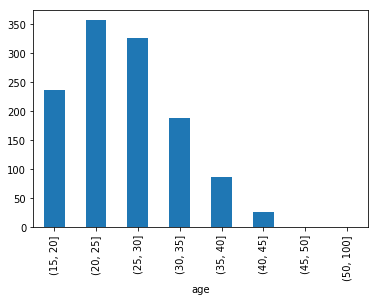

Male


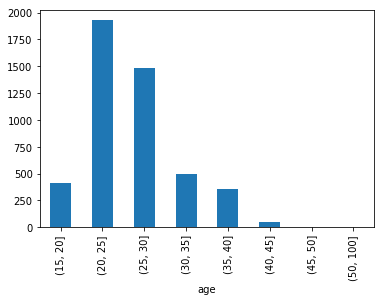



Spain
Female


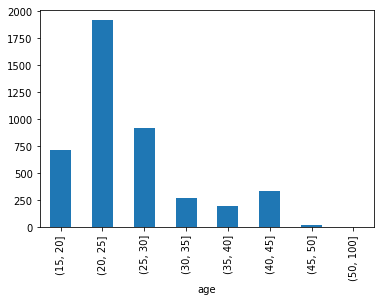

Male


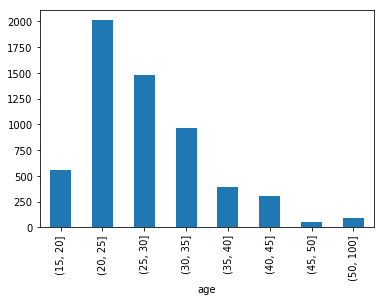



Thailand
Female


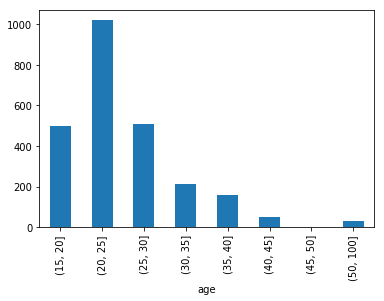

Male


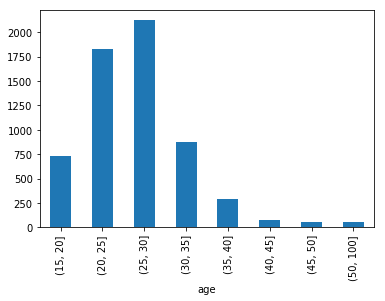

In [11]:
for country in set(df.country):
    show_age(country,df)

## Gender ratio in different countires 

In [12]:
def show_gender(country):
    print('\n')
    print(country)
    temp_df = df[df.country==country][['gender','user_id']].drop_duplicates().groupby('gender').count()
    print("Male / Femal: {}".format(round(float(temp_df.loc['Male']/temp_df.loc['Female']),2)))
    print(temp_df)

In [13]:
for country in set(df.country):
    show_gender(country)



Italy
Male / Femal: 1.15
        user_id
gender         
Female      150
Male        172


Argentina
Male / Femal: 0.89
        user_id
gender         
Female      218
Male        195


Indonesia
Male / Femal: 3.45
        user_id
gender         
Female       80
Male        276


Spain
Male / Femal: 1.15
        user_id
gender         
Female      291
Male        334


Thailand
Male / Femal: 2.01
        user_id
gender         
Female      165
Male        332


# Tinder usage statistis 

In [14]:
weekday=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

## More users active in the middle of the week

In [15]:
def login_per_day(country):
    val_list=df[df.country==country].groupby('weekday')['is_active_user'].sum().values 
    plt.plot(weekday,val_list,'-o',label=country)
    plt.title('Daily acitive users on different day of week',fontsize = 15)
    plt.legend()

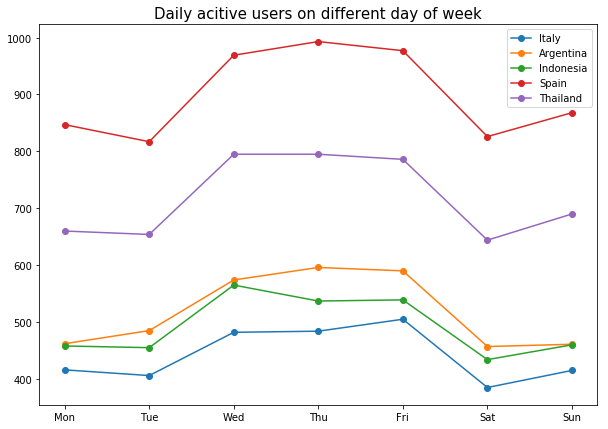

In [16]:
plt.figure(figsize = (10,7))
for country in set(df.country):
    login_per_day(country=country)

# Weekly Churn analyis

In [17]:
user_activiate_weekly = df.groupby(['user_id','weekofmonth'])[['is_active_user','swipes_sent','swipes_received','likes_sent','likes_received','matches','messages_sent','messages_received']].sum().reset_index()


In [18]:
user_activiate_weekly['match_rate'] = user_activiate_weekly['matches'] / user_activiate_weekly['swipes_sent']
user_activiate_weekly['beliked_rate'] = user_activiate_weekly['likes_received'] / user_activiate_weekly['swipes_received']
user_activiate_weekly['messaged_rate'] = user_activiate_weekly['messages_sent'] / user_activiate_weekly['matches']
user_activiate_weekly['like received per swipe'] = user_activiate_weekly['likes_received'] / user_activiate_weekly['swipes_sent']


In [19]:
user_activiate_weekly['weekly_churn_indicator'] = (user_activiate_weekly['is_active_user']<=0).astype(int)

In [20]:
user_activiate_weekly['if_next_week_churn']=user_activiate_weekly.groupby('user_id')['weekly_churn_indicator'].shift(-1)

In [21]:
user_age = df[['user_id','age']].groupby('user_id').mean().astype(int).reset_index()
user_activiate_weekly = user_activiate_weekly.merge(user_age)
user_activiate_weekly = user_activiate_weekly.merge(df[['user_id','gender','device_type','country']].drop_duplicates())

In [22]:
user_activiate_weekly[user_activiate_weekly.if_next_week_churn == 1].describe()

,user_id,weekofmonth,is_active_user,swipes_sent,swipes_received,likes_sent,likes_received,matches,messages_sent,messages_received,match_rate,beliked_rate,messaged_rate,like received per swipe,weekly_churn_indicator,if_next_week_churn,age
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,660.000000,987.000000,532.000000,941.000000,1008.000000,1008.0,1008.000000
mean,1093.305556,2.695437,1.542659,130.599206,463.408730,19.692460,129.114087,3.709325,11.615079,13.761905,inf,0.199529,inf,inf,0.301587,1.0,26.264881
std,631.862137,1.145562,1.599455,329.485239,781.756413,65.592848,342.158024,10.670000,47.186720,54.896986,NaN,0.184376,NaN,NaN,0.459175,0.0,6.821768
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,18.000000
25%,532.000000,2.000000,0.000000,0.000000,80.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.060705,0.000000,0.341727,0.000000,1.0,21.000000
50%,1063.000000,3.000000,1.000000,10.000000,191.500000,1.000000,24.000000,0.000000,0.000000,0.000000,0.023859,0.137931,0.509259,3.285714,0.000000,1.0,25.000000
75%,1663.500000,4.000000,2.000000,113.500000,507.500000,12.000000,91.500000,2.000000,2.000000,3.000000,0.101038,0.296394,3.666667,NaN,1.000000,1.0,29.000000
max,2196.000000,4.000000,7.000000,3563.000000,7797.000000,991.000000,4379.000000,126.000000,662.000000,781.000000,inf,1.000000,inf,inf,1.000000,1.0,80.000000


In [23]:
user_activiate_weekly[user_activiate_weekly.if_next_week_churn == 0].describe()

,user_id,weekofmonth,is_active_user,swipes_sent,swipes_received,likes_sent,likes_received,matches,messages_sent,messages_received,match_rate,beliked_rate,messaged_rate,like received per swipe,weekly_churn_indicator,if_next_week_churn,age
count,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,3649.000000,3970.000000,3261.000000,3924.000000,4030.000000,4030.0,4030.000000
mean,1108.682382,2.471216,4.100000,442.393300,519.743424,69.629529,141.638213,9.746402,44.153102,46.773449,inf,0.196943,inf,inf,0.066998,0.0,27.489330
std,634.126420,1.113352,2.278385,756.308434,822.649208,124.157263,361.217915,22.410788,150.537848,147.861951,NaN,0.157880,NaN,NaN,0.250049,0.0,7.530678
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,18.000000
25%,571.000000,1.000000,2.000000,50.000000,113.000000,5.000000,11.000000,1.000000,0.000000,0.000000,0.005865,0.076154,0.500000,0.066667,0.000000,0.0,22.000000
50%,1095.000000,2.000000,4.000000,182.000000,237.000000,25.000000,33.000000,4.000000,6.000000,6.000000,0.019284,0.153715,2.142857,0.210547,0.000000,0.0,26.000000
75%,1665.000000,3.000000,6.000000,510.000000,544.000000,77.000000,99.000000,10.000000,38.000000,39.000000,0.051034,0.283037,6.256410,0.901563,0.000000,0.0,31.000000
max,2197.000000,4.000000,7.000000,9639.000000,9439.000000,1738.000000,6309.000000,594.000000,6189.000000,4163.000000,inf,1.000000,inf,inf,1.000000,0.0,114.000000


# weekly retention rate 

In [24]:
total_holder = []
total_holder2 = []
total_holder3 =[]
for i in range(1,5):
    first_week =  user_activiate_weekly[user_activiate_weekly['weekofmonth'] == i]
    second_week = user_activiate_weekly[user_activiate_weekly['weekofmonth'] == i+1]
    total1 = len(first_week[first_week.is_active_user>0].user_id)
    total_holder.append(total1)
    user_list = first_week[first_week.is_active_user>0].user_id
    total2 = sum(second_week[second_week.is_active_user>0].user_id.isin(user_list))
    total_holder2.append(total2)
    totalnew2 = sum(~second_week[second_week.is_active_user>0].user_id.isin(user_list))
    total_holder3.append(totalnew2)

In [25]:
# users don’t return the following week
total_churn_rate = 1- sum(total_holder2)/sum(total_holder)
print(total_churn_rate)

0.24481074481074483


In [26]:
# new active users compared to the previous week
new_comer_rate = sum(total_holder3)/sum(total_holder)
new_comer_rate

0.2264957264957265

In [27]:
# much lower message rate !!!

In [30]:
user_activiate_weekly=user_activiate_weekly.replace(np.inf, np.nan)

In [31]:
# match rate eda 

In [32]:
def churn_plot(col):
    user_churn = user_activiate_weekly[user_activiate_weekly.if_next_week_churn == 1][[col]].mean()
    non_churn = user_activiate_weekly[user_activiate_weekly.if_next_week_churn == 0][[col]].mean()
    x = ['churn','retent']
    y = [user_churn.values[0], non_churn.values[0]]
    return x, y

In [33]:
user_activiate_weekly = user_activiate_weekly.replace(np.inf, np.nan)

In [34]:
x, y = churn_plot(col = 'beliked_rate')

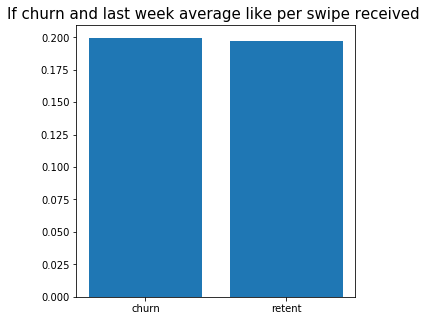

In [35]:
plt.figure(figsize=(5,5))
plt.bar(x, y)
plt.title("If churn and last week average like per swipe received ",fontsize=15)
plt.rc('xtick',labelsize=15)

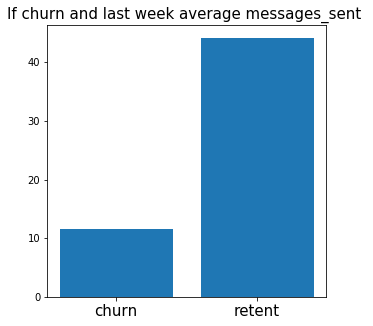

In [36]:
x, y = churn_plot(col = 'messages_sent')
plt.figure(figsize=(5,5))
plt.bar(x, y)
plt.title("If churn and last week average messages_sent ",fontsize=15)
plt.rc('xtick',labelsize=15)

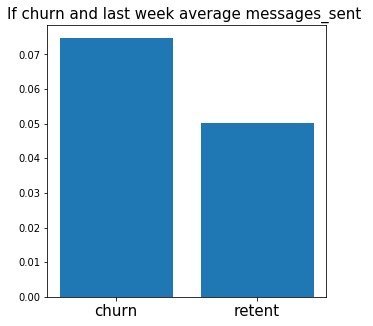

In [37]:
x, y = churn_plot(col = 'match_rate')
plt.figure(figsize=(5,5))
plt.bar(x, y)
plt.title("If churn and last week average messages_sent ",fontsize=15)
plt.rc('xtick',labelsize=15)

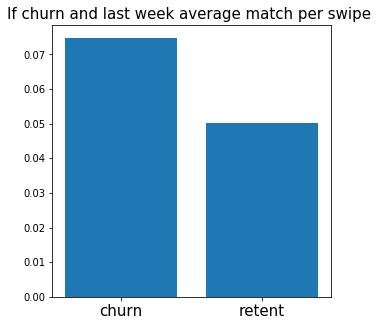

In [39]:
x, y = churn_plot(col = 'match_rate')
plt.figure(figsize=(5,5))
plt.bar(x, y)
plt.title("If churn and last week average match per swipe ",fontsize=15)
plt.rc('xtick',labelsize=15)

# Build a model to predict if the user will churn next week 

In [58]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from imblearn.pipeline import make_pipeline as make_imb_pipeline

In [51]:
data = user_activiate_weekly[~user_activiate_weekly.if_next_week_churn.isna()]

In [53]:
data_train = data[['swipes_sent',
       'swipes_received', 'likes_sent', 'likes_received', 'matches',
       'messages_sent', 'messages_received', 'match_rate', 'beliked_rate',
       'messaged_rate', 'like received per swipe', 'weekly_churn_indicator']]

In [54]:
data_target = data['if_next_week_churn']

In [60]:
undersample_pipe = make_imb_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),SMOTE(),RandomForestClassifier(n_estimators = 3))
scores = cross_validate(undersample_pipe,
                        data_train, data_target, cv=5,
                        scoring=('roc_auc','accuracy','average_precision','recall','f1'))
print("-------test_roc_auc------\n"+str(scores['test_roc_auc'].mean()))
print("-------test_accuracy------\n"+str(scores['test_accuracy'].mean()))
print("-------test_average_precision------\n"+str(scores['test_average_precision'].mean()))
print("-------test_f1------\n"+str(scores['test_f1'].mean()))
print("-------recall------\n"+str(scores['test_recall'].mean()))

-------test_roc_auc------
0.6466276551546863
-------test_accuracy------
0.7163522012578616
-------test_average_precision------
0.29013450966527576
-------test_f1------
0.3645859686080756
-------recall------
0.40673365844047094
